# Poject Initilization 

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
img1 = Image.open('dogs.jpeg')    # Loading Image 

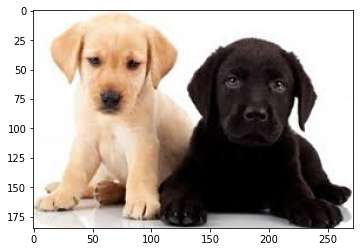

In [3]:
plt.imshow(img1)      # USing matplotlib to show image

In [4]:
#  Checking Dimentions of image  
print("Image Weidth: ",img1.size[0])
print("Image Height: ",img1.size[1])

Image Weidth:  272
Image Height:  185


In [23]:
#Converting image to 2D to apply clustering based on RGB values
image_Array = np.array(img1)
_data1 = image_Array.reshape(-1,3)
image_Array_RGB = pd.DataFrame(data = _data1 , columns=['R','G','B'])
image_Array_RGB.head()

,R,G,B
0,240,240,240
1,255,255,255
2,255,255,255
3,251,251,251
4,255,255,255


# Initilizing and Fiting Kmeans Unsupervised model  

In [6]:
from sklearn.cluster import KMeans

In [7]:
Model_KM_1 = KMeans(n_clusters=3)

In [8]:
Model_KM_1.fit(image_Array_RGB)

KMeans(n_clusters=3)

In [9]:
Labels  = np.array(Model_KM_1.labels_)     # Resulted LAbels from KMeans

In [10]:
np.unique(Labels)

array([0, 1, 2])

In [11]:
image_Array_RGB['Labels'] = Model_KM_1.labels_ 

# Three most  dominant colors in the image:

In [12]:
Model_KM_1.cluster_centers_

array([[ 29.6078335 ,  21.65219054,  20.49928985],
       [251.71721686, 247.9357034 , 243.44408329],
       [210.86205777, 175.41885751, 144.51144109]])

### Replacing most dominant colors in the image_Array_RGB from cluster_centers_

In [13]:
image_Array_RGB.loc[image_Array_RGB['Labels'] == 0]=np.append(Model_KM_1.cluster_centers_[0],0)
image_Array_RGB.loc[image_Array_RGB['Labels'] == 1]=np.append(Model_KM_1.cluster_centers_[1],1)
image_Array_RGB.loc[image_Array_RGB['Labels'] == 2]=np.append(Model_KM_1.cluster_centers_[2],2)

## verifying new 3D array based on cluster_centers values

In [14]:
image_Array_RGB.groupby(['Labels']).mean()

,R,G,B
Labels,,,
0,29.607833,21.652191,20.499290
1,251.717217,247.935703,243.444083
2,210.862058,175.418858,144.511441


In [15]:
image_Array_RGB.groupby(['Labels']).nunique()

,R,G,B
Labels,,,
0,1,1,1
1,1,1,1
2,1,1,1


In [16]:
New3dImage = image_Array_RGB.drop(['Labels'], axis =1)

In [17]:
New3dImage = New3dImage.values.astype(int)

## New 1D to 2D image conversion based on new generated lables

In [18]:
new_3color_Image = np.array(image_Array_RGB['Labels']).reshape(185,272)

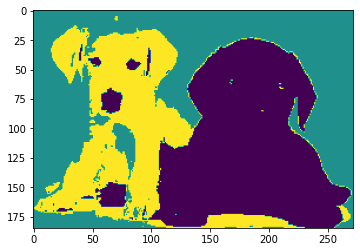

In [19]:
plt.imshow(new_3color_Image) 

## New 3D image based on 3 most dominant colors

In [21]:
New3dImage = New3dImage.ravel().reshape(185,272,3)

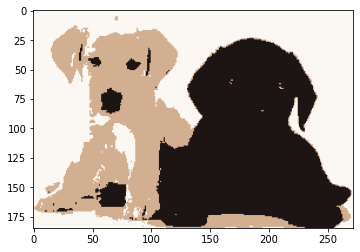

In [22]:
plt.imshow(New3dImage)